In [2]:
import pandas as pd
from sklearn.utils import shuffle
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from math import sqrt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.cross_validation import cross_val_score

import scipy

/Users/Tejaswis/anaconda3/envs/comp47350py36/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# (1)Prepare a data quality report for the CSV file.

In [3]:

# df is created from original dataset
# replaced by cleaned version once quality plan is complete
df = pd.read_csv('OnlineNewsPopularityCleaned.csv', skipinitialspace=True)
pd.options.display.max_columns = None
pd.options.display.max_rows = None
#df = df.drop(['url', 'timedelta'], axis=1)
# drop non-predictive features

In [4]:
#Print (rows, columns)
df.head(3)

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,496.0,496.0,496.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.5,-0.1875,0.0,0.1875,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.799756,0.050047,0.050096,0.050101,0.050001,0.341246,0.148948,0.043137,0.015686,0.733333,0.266667,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.0,0.0000,0.5,0.0000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,918.0,918.0,918.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.217792,0.033334,0.033351,0.033334,0.682188,0.702222,0.323333,0.056872,0.009479,0.857143,0.142857,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.0,0.0000,0.5,0.0000,1500


In [5]:
df1 = df.drop('shares', axis=1)
df2=df1.drop('url', axis=1)

In [6]:
df3=scipy.sparse.csr_matrix(df2.values)

In [7]:
y=df.as_matrix(columns=['shares'])

In [268]:
col=list(df2.columns.values)

### features selected by using the information gain entropy for recommendations

In [269]:
import sklearn
res = dict(zip(col,
               sklearn.feature_selection.mutual_info_classif(df3, y, discrete_features=True)
               ))

/Users/Tejaswis/anaconda3/envs/comp47350py36/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{'LDA_00': 5.3683915362330374,
 'LDA_01': 5.3523199569360722,
 'LDA_02': 5.3781644224537075,
 'LDA_03': 5.3462810765221249,
 'LDA_04': 5.3710643647200067,
 'abs_title_sentiment_polarity': 0.50702816220588831,
 'abs_title_subjectivity': 0.43979556291202926,
 'average_token_length': 4.862218222274274,
 'avg_negative_polarity': 3.2184776499478405,
 'avg_positive_polarity': 4.550486467232763,
 'data_channel_is_bus': 0.019734703530144952,
 'data_channel_is_entertainment': 0.028221257938357381,
 'data_channel_is_lifestyle': 0.016517076680820295,
 'data_channel_is_socmed': 0.021559352173343017,
 'data_channel_is_tech': 0.025760582972089992,
 'data_channel_is_world': 0.033772286388906787,
 'global_rate_negative_words': 3.2334070871857832,
 'global_rate_positive_words': 3.6223875279391913,
 'global_sentiment_polarity': 5.0554207505644913,
 'global_subjectivity': 5.0455606551707159,
 'is_weekend': 0.033357583699486673,
 'kw_avg_avg': 5.3674749949656313,
 'kw_avg_max': 5.0014755022737392,
 'kw_avg_min': 4.1477465186447944,
 'kw_max_avg': 4.2258022861775739,
 'kw_max_max': 0.099661120751210974,
 'kw_max_min': 1.6862121516285513,
 'kw_min_avg': 2.7190278778614578,
 'kw_min_max': 0.99983234514130503,
 'kw_min_min': 0.053593571044521754,
 'max_negative_polarity': 0.25845928194887174,
 'max_positive_polarity': 0.17879915239025657,
 'min_negative_polarity': 0.28497092261873314,
 'min_positive_polarity': 0.18594115670637662,
 'n_non_stop_unique_tokens': 4.5355325459776816,
 'n_non_stop_words': 1.8600226943587341,
 'n_tokens_content': 2.2139975492463311,
 'n_tokens_title': 0.16149333202589627,
 'n_unique_tokens': 4.7738715496223669,
 'num_hrefs': 0.42329342722289792,
 'num_imgs': 0.28439453282237359,
 'num_keywords': 0.12456877659897686,
 'num_self_hrefs': 0.19677041286643404,
 'num_videos': 0.14253212459190581,
 'rate_negative_words': 1.5064827587538716,
 'rate_positive_words': 1.5158634846150842,
 'self_reference_avg_sharess': 2.2845925840343497,
 'self_reference_max_shares': 1.2087976581423132,
 'self_reference_min_shares': 1.3049492964946465,
 'timedelta': 1.7723839453974395,
 'title_sentiment_polarity': 0.6089786677705652,
 'title_subjectivity': 0.5472633834302385,
 'weekday_is_friday': 0.018957945216486138,
 'weekday_is_monday': 0.019821589042664917,
 'weekday_is_saturday': 0.022387405911094269,
 'weekday_is_sunday': 0.020253328014658761,
 'weekday_is_thursday': 0.01962792154740356,
 'weekday_is_tuesday': 0.020586316422148067,
 'weekday_is_wednesday': 0.020629877393717369}

### - Check how many rows and columns your CSV has.

We have a 39644 articles in our dataframe, with 33 features associated with each individual article.

### - Print the first and the last 5 rows.

In [270]:
df.head(5)

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,496.0,496.0,496.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.799756,0.050047,0.050096,0.050101,0.050001,0.341246,0.148948,0.043137,0.015686,0.733333,0.266667,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,918.0,918.0,918.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.217792,0.033334,0.033351,0.033334,0.682188,0.702222,0.323333,0.056872,0.009479,0.857143,0.142857,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028573,0.419300,0.494651,0.028905,0.028572,0.429850,0.100705,0.041431,0.020716,0.666667,0.333333,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,545.0,16000.0,3151.157895,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028633,0.028794,0.028575,0.028572,0.885427,0.513502,0.281003,0.074627,0.012127,0.860215,0.139785,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [271]:
df.tail(5)

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
38458,http://mashable.com/2014/12/27/samsung-app-aut...,8.0,11.0,346.0,0.529052,1.0,0.684783,9.0,7.0,1.0,1.0,4.523121,8.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.0,671.0,173.125,26900.0,843300.0,374962.500000,2514.742857,4004.342857,3031.115764,11400.0,48000.0,37033.333333,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.025038,0.025001,0.151701,0.025000,0.773260,0.482679,0.141964,0.037572,0.014451,0.722222,0.277778,0.333791,0.100000,0.75,-0.260000,-0.5,-0.125000,0.100000,0.000000,0.400000,0.000000,1800
38459,http://mashable.com/2014/12/27/seth-rogen-jame...,8.0,12.0,328.0,0.696296,1.0,0.885057,9.0,7.0,3.0,48.0,4.405488,7.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.0,616.0,184.000,6500.0,843300.0,192985.714286,1664.267857,5470.168651,3411.660830,2100.0,2100.0,2100.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.029349,0.028575,0.231866,0.681635,0.028575,0.564374,0.194249,0.039634,0.009146,0.812500,0.187500,0.374825,0.136364,0.70,-0.211111,-0.4,-0.100000,0.300000,1.000000,0.200000,1.000000,1900
38460,http://mashable.com/2014/12/27/son-pays-off-mo...,8.0,10.0,442.0,0.516355,1.0,0.644128,24.0,1.0,12.0,1.0,5.076923,8.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,691.0,168.250,6200.0,843300.0,295850.000000,1753.882353,6880.687034,4206.439195,1400.0,1400.0,1400.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.159004,0.025025,0.025207,0.643794,0.146970,0.510296,0.024609,0.033937,0.024887,0.576923,0.423077,0.307273,0.136364,0.50,-0.356439,-0.8,-0.166667,0.454545,0.136364,0.045455,0.136364,1900
38461,http://mashable.com/2014/12/27/ukraine-blasts/,8.0,6.0,682.0,0.539493,1.0,0.692661,10.0,1.0,1.0,0.0,4.975073,5.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,0.0,-1.000,0.0,843300.0,254600.000000,0.000000,3384.316871,1777.895883,452.0,452.0,452.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.040004,0.040003,0.839987,0.040002,0.040004,0.358578,-0.008066,0.020528,0.023460,0.466667,0.533333,0.236851,0.062500,0.50,-0.205246,-0.5,-0.012500,0.000000,0.000000,0.500000,0.000000,1100
38462,http://mashable.com/2014/12/27/youtube-channel...,8.0,10.0,157.0,0.701987,1.0,0.846154,1.0,1.0,0.0,2.0,4.471338,4.0,0.0,1.0,0.0,0.0,0.0,0.0,-1.0,97.0,23.500,205600.0,843300.0,366200.000000,3035.080555,3613.512953,3296.909481,2100.0,2100.0,2100.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.050001,0.799339,0.050000,0.050659,0.050001,0.517893,0.104892,0.063694,0.012739,0.833333,0.166667,0.247338,0.100000,0.50,-0.200000,-0.2,-0.200000,0.333333,0.250000,0.166667,0.250000,1300


### - Convert the features to their appropriate data types (e.g., decide which features are more appropriate as continuous and which ones as categorical types). 

In [272]:
df.dtypes

url                               object
timedelta                        float64
n_tokens_title                   float64
n_tokens_content                 float64
n_unique_tokens                  float64
n_non_stop_words                 float64
n_non_stop_unique_tokens         float64
num_hrefs                        float64
num_self_hrefs                   float64
num_imgs                         float64
num_videos                       float64
average_token_length             float64
num_keywords                     float64
data_channel_is_lifestyle        float64
data_channel_is_entertainment    float64
data_channel_is_bus              float64
data_channel_is_socmed           float64
data_channel_is_tech             float64
data_channel_is_world            float64
kw_min_min                       float64
kw_max_min                       float64
kw_avg_min                       float64
kw_min_max                       float64
kw_max_max                       float64
kw_avg_max      

We have concluded that it might be more efficient to convert the features relating to data channel type (eg data_channel_is_lifestyle) and days of the week (eg, weekday_is_monday) on which an article was published into categorical features.
This would mean a single categorical feature 'weekday', with seven levels (ie monday through to sunday).
And another categorical feature 'data_channel', which would have six levels (lifestyle, entertainment, socmed, bus, tech, world)

In [273]:
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,496.0,496.0,496.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.799756,0.050047,0.050096,0.050101,0.050001,0.341246,0.148948,0.043137,0.015686,0.733333,0.266667,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,918.0,918.0,918.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.217792,0.033334,0.033351,0.033334,0.682188,0.702222,0.323333,0.056872,0.009479,0.857143,0.142857,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028573,0.419300,0.494651,0.028905,0.028572,0.429850,0.100705,0.041431,0.020716,0.666667,0.333333,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,545.0,16000.0,3151.157895,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028633,0.028794,0.028575,0.028572,0.885427,0.513502,0.281003,0.074627,0.012127,0.860215,0.139785,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [274]:
df.dtypes

url                               object
timedelta                        float64
n_tokens_title                   float64
n_tokens_content                 float64
n_unique_tokens                  float64
n_non_stop_words                 float64
n_non_stop_unique_tokens         float64
num_hrefs                        float64
num_self_hrefs                   float64
num_imgs                         float64
num_videos                       float64
average_token_length             float64
num_keywords                     float64
data_channel_is_lifestyle        float64
data_channel_is_entertainment    float64
data_channel_is_bus              float64
data_channel_is_socmed           float64
data_channel_is_tech             float64
data_channel_is_world            float64
kw_min_min                       float64
kw_max_min                       float64
kw_avg_min                       float64
kw_min_max                       float64
kw_max_max                       float64
kw_avg_max      

In [275]:
# check for duplicate rows
print('Duplicate rows:', df.duplicated()[df.duplicated() == True].shape[0])

Duplicate rows: 0


In [276]:
# Check for duplicate columns
print('Duplicate columns:',df.columns.size - df.columns.unique().size)

Duplicate columns: 0


In [277]:
df.shape

(38463, 61)

In [8]:
df_shuffle=shuffle(df)

In [9]:
df_train=df_shuffle.head(27751)

In [10]:
df_test=df_shuffle.head(11893)

In [11]:
df_train.head(10)

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
24881,http://mashable.com/2014/05/13/motorola-unveil...,240.0,11.0,384.0,0.529101,1.0,0.718894,5.0,2.0,1.0,0.0,5.010417,9.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,60.0,26.500000,0.0,843300.0,254700.000000,0.000000,3591.297528,1628.789769,29900.0,29900.0,29900.00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.133569,0.022228,0.700713,0.022226,0.121264,0.378956,0.200168,0.052083,0.005208,0.909091,0.090909,0.367803,0.100000,0.60,-0.075000,-0.100000,-0.050000,0.400000,0.100000,0.100000,0.100000,1400
19415,http://mashable.com/2014/01/29/google-motorola...,344.0,8.0,937.0,0.424731,1.0,0.630769,29.0,0.0,1.0,0.0,4.517609,7.0,0.0,0.0,1.0,0.0,0.0,0.0,-1.0,2500.0,504.931667,0.0,843300.0,270185.714286,0.000000,4700.562914,2969.984880,0.0,0.0,0.00,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.885632,0.028574,0.028572,0.028596,0.028626,0.530962,0.215881,0.067236,0.012807,0.840000,0.160000,0.410600,0.050000,1.00,-0.374471,-1.000000,-0.071429,0.000000,0.000000,0.500000,0.000000,2500
18128,http://mashable.com/2014/01/02/plownyc-snow-re...,371.0,12.0,1531.0,0.488011,1.0,0.626719,6.0,6.0,50.0,1.0,4.628347,7.0,0.0,1.0,0.0,0.0,0.0,0.0,-1.0,782.0,189.798571,20300.0,843300.0,464428.571429,2858.806752,5812.913735,4422.921302,795.0,49500.0,18098.75,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.028573,0.294332,0.028613,0.619912,0.028572,0.393923,0.074799,0.021555,0.016329,0.568966,0.431034,0.441958,0.062500,1.00,-0.310077,-0.800000,-0.050000,0.500000,-0.375000,0.000000,0.375000,4300
23912,http://mashable.com/2014/04/25/facebook-google...,258.0,11.0,32.0,0.843750,1.0,0.850000,1.0,1.0,1.0,0.0,5.250000,5.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,529.0,123.400000,12200.0,843300.0,301120.000000,1641.230216,4200.987730,2847.050096,1200.0,1200.0,1200.00,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.040002,0.040000,0.839996,0.040000,0.040002,0.950000,-0.150000,0.031250,0.031250,0.500000,0.500000,0.500000,0.500000,0.50,-0.800000,-0.800000,-0.800000,0.100000,0.200000,0.400000,0.200000,1500
20096,http://mashable.com/2014/02/11/marijuana-rfid-...,331.0,9.0,197.0,0.637755,1.0,0.752137,4.0,1.0,2.0,0.0,5.192893,7.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.0,849.0,290.655714,2800.0,843300.0,250885.714286,1431.578947,5764.981596,3095.570091,2900.0,2900.0,2900.00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.319055,0.028573,0.028612,0.028572,0.595189,0.511722,0.260885,0.076142,0.005076,0.937500,0.062500,0.362121,0.100000,1.00,-0.100000,-0.100000,-0.100000,0.000000,0.000000,0.500000,0.000000,916
17742,http://mashable.com/2013/12/20/kmart-metrics/,384.0,8.0,580.0,0.538188,1.0,0.714286,10.0,0.0,1.0,0.0,4.677586,5.0,0.0,0.0,1.0,0.0,0.0,0.0,-1.0,647.0,296.918000,7900.0,843300.0,455880.000000,2353.730769,5417.344828,3846.229445,0.0,0.0,0.00,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.640025,0.238744,0.040000,0.040000,0.041230,0.297420,0.131059,0.060345,0.013793,0.813953,0.186047,0.268013,0.033333,1.00,-0.209028,-0.500000,-0.100000,0.454545,0.136364,0.045455,0.136364,2300
18917,http://mashable.com/2014/01/19/ice-skating-gifs/,354.0,11.0,922.0

In [12]:
df_train.dtypes

url                               object
timedelta                        float64
n_tokens_title                   float64
n_tokens_content                 float64
n_unique_tokens                  float64
n_non_stop_words                 float64
n_non_stop_unique_tokens         float64
num_hrefs                        float64
num_self_hrefs                   float64
num_imgs                         float64
num_videos                       float64
average_token_length             float64
num_keywords                     float64
data_channel_is_lifestyle        float64
data_channel_is_entertainment    float64
data_channel_is_bus              float64
data_channel_is_socmed           float64
data_channel_is_tech             float64
data_channel_is_world            float64
kw_min_min                       float64
kw_max_min                       float64
kw_avg_min                       float64
kw_min_max                       float64
kw_max_max                       float64
kw_avg_max      

# Understanding data

In [283]:
# Look at correlations for all the continuous features.
df_train[[ 'n_tokens_title', 'n_tokens_content',
       'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens',
       'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos',
       'average_token_length', 'num_keywords','kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess','is_weekend','LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'global_rate_negative_words', 'rate_positive_words',
       'rate_negative_words', 'avg_positive_polarity', 'min_positive_polarity',
       'max_positive_polarity', 'avg_negative_polarity',
       'min_negative_polarity', 'max_negative_polarity', 'title_subjectivity',
       'title_sentiment_polarity', 'abs_title_subjectivity',
       'abs_title_sentiment_polarity','shares']].corr()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
n_tokens_title,1.000000,0.026921,-0.004574,-0.003948,-0.004213,-0.049999,-0.009953,-0.012768,0.049772,-0.094966,-0.008005,-0.113946,-0.011508,-0.036345,0.010171,0.123000,0.113191,-0.008942,0.001320,-0.007064,-0.002678,0.003083,0.002916,-0.005625,-0.065717,0.070712,0.044176,0.024970,-0.061598,-0.036488,-0.061525,-0.049022,0.027511,-0.047472,0.048846,-0.027911,-0.014833,0.005060,-0.034550,-0.043405,0.004383,0.075841,0.000510,-0.145822,0.039765,0.004395
n_tokens_content,0.026921,1.000000,-0.005215,0.012856,-0.002516,0.395968,0.267705,0.353496,0.098636,-0.075277,0.087683,-0.066071,0.003590,-0.005942,-0.014437,0.073066,-0.063899,-0.008142,-0.014889,-0.050512,-0.035222,0.016902,-0.021535,0.057016,0.013611,-0.008529,0.081531,-0.106386,0.020295,-0.008905,-0.023982,0.060943,0.076311,-0.037784,0.038053,0.018032,-0.320428,0.365834,-0.068466,-0.412055,0.273794,0.011017,0.023277,0.003533,0.023104,0.003869
n_unique_tokens,-0.004574,-0.005215,1.000000,0.999705,0.999926,-0.007577,0.005114,0.025008,-0.001406,0.001663,-0.002970,-0.000519,-0.000674,-0.001600,0.001845,0.000585,0.005861,0.007847,-0.001389,0.001296,-0.000223,-0.001648,0.000578,-0.003401,-0.004877,-0.002102,-0.007509,-0.000099,-0.007169,-0.029428,-0.006586,-0.014237,-0.010141,-0.027083,-0.012831,-0.024674,0.000027,-0.029806,0.013987,0.019756,0.000341,-0.004742,-0.002062,-0.011406,-0.004155,0.001597
n_non_stop_words,-0.003948,0.012856,0.999705,1.000000,0.999666,-0.000098,0.010194,0.033262,-0.001811,0.000210,-0.000685,-0.002363,-0.000612,-0.001701,0.001051,0.002588,0.003412,0.007004,-0.002168,-0.000895,-0.000961,-0.001537,0.000044,-0.002314,-0.004238,-0.003856,-0.004607,-0.004457,-0.004918,-0.030984,-0.007630,-0.015092,-0.009723,-0.028000,-0.011889,-0.025600,-0.008391,-0.022041,0.013258,0.011545,0.007043,-0.005228,-0.001597,-0.010888,-0.004132,0.001366
n_non_stop_unique_tokens,-0.004213,-0.002516,0.999926,0.999666,1.000000,-0.009532,0.004634,0.020895,-0.001887,-0.001964,-0.003359,-0.000522,-0.000736,-0.001593,0.001615,0.000649,0.004799,0.006628,-0.002373,-0.000971,-0.000461,-0.001873,0.000284,-0.003608,-0.003306,-0.002265,-0.006006,-0.003988,-0.006069,-0.030289,-0.007048,-0.013142,-0.009413,-0.027227,-0.012677,-0.025380,-0.002703,-0.028232,0.013993,0.017480,0.002501,-0.005513,-0.002470,-0.010998,-0.004876,0.001160
num_hrefs,-0.049999,0.395968,-0.007577,-0.000098,-0.009532,1.000000,0.378496,0.348835,0.122829,0.202758,0.135047,-0.055246,0.017298,0.007965,-0.010077,0.060697,0.015210,0.073324,0.091862,0.160015,-0.011233,0.077200,0.016511,0.074682,-0.032455,-0.055185,-0.019847,0.166690,-0.074858,0.119769,0.051123,-0.011429,-0.011197,-0.007334,0.007866,0.111446,-0.121997,0.231397,-0.102106,-0.225540,0.089385,0.049874,0.041290,0.005990,0.062110,0.053993
num_self_hrefs,-0.009953,0.267705,0.005114,0.010194,0.004634,0.378496,1.000000,0.236285,0.079506,-0.037954,0.108323,-0.023024,-0.003157,-0.003166,-0.020242,0.009786,-0.040684,0.057484,-0.002950,0.010265,-0.036254,0.127713,0.013893,0.052805,-0.031518,-0.004508,-0.095468,0.002230,0.122155,0.021439,0.060539,0.068985,-0.032265,0.064240,-0.064409,0.011367,-0.109955,0.131005,-0.010486,-0.079935,0.063962,-0.007778,0.030993,0.007058,-0.002059,0.001033
num_imgs,-0.012768,0.353496,0.025008,0.033262

In [284]:
# Look at correlations for all the continuous features.
df_train[[ 'n_tokens_title', 'n_tokens_content',
       'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens',
       'num_hrefs', 'num_self_hrefs', 'num_imgs', 'shares']].corr()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,shares
n_tokens_title,1.000000,0.026921,-0.004574,-0.003948,-0.004213,-0.049999,-0.009953,-0.012768,0.004395
n_tokens_content,0.026921,1.000000,-0.005215,0.012856,-0.002516,0.395968,0.267705,0.353496,0.003869
n_unique_tokens,-0.004574,-0.005215,1.000000,0.999705,0.999926,-0.007577,0.005114,0.025008,0.001597
n_non_stop_words,-0.003948,0.012856,0.999705,1.000000,0.999666,-0.000098,0.010194,0.033262,0.001366
n_non_stop_unique_tokens,-0.004213,-0.002516,0.999926,0.999666,1.000000,-0.009532,0.004634,0.020895,0.001160
num_hrefs,-0.049999,0.395968,-0.007577,-0.000098,-0.009532,1.000000,0.378496,0.348835,0.053993
num_self_hrefs,-0.009953,0.267705,0.005114,0.010194,0.004634,0.378496,1.000000,0.236285,0.001033
num_imgs,-0.012768,0.353496,0.025008,0.033262,0.020895,0.348835,0.236285,1.000000,0.049348
shares,0.004395,0.003869,0.001597,0.001366,0.001160,0.053993,0.001033,0.049348,1.000000


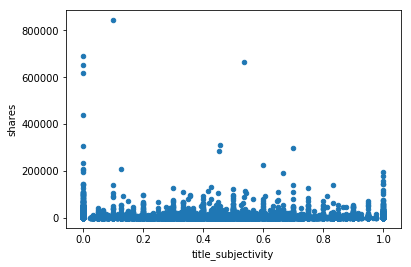

In [285]:
plt.figure()

df.plot(kind='scatter', x='title_subjectivity', y='shares')

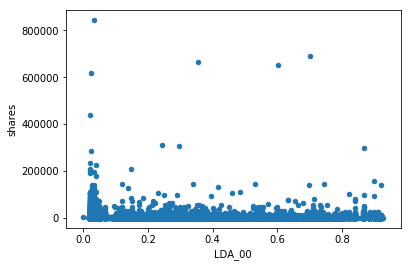

In [286]:
df.plot(kind='scatter', x='LDA_00', y='shares')

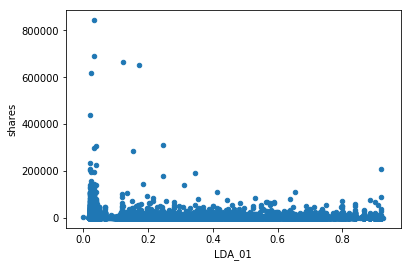

In [287]:
df.plot(kind='scatter', x='LDA_01', y='shares')

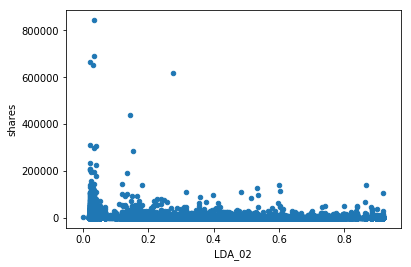

In [288]:
df.plot(kind='scatter', x='LDA_02', y='shares')

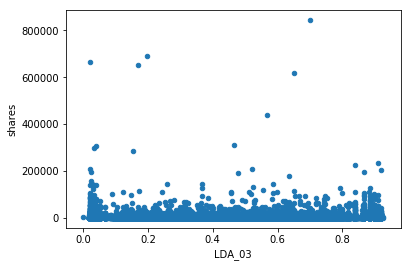

In [289]:
df.plot(kind='scatter', x='LDA_03', y='shares')

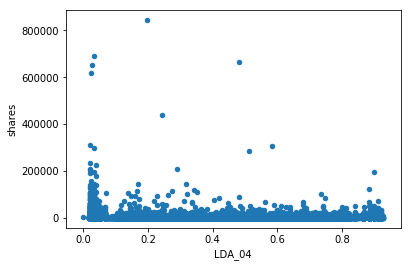

In [290]:
df.plot(kind='scatter', x='LDA_04', y='shares')

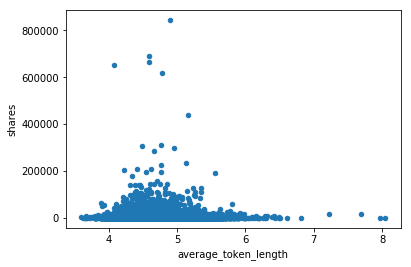

In [291]:
df.plot(kind='scatter', x='average_token_length', y='shares')

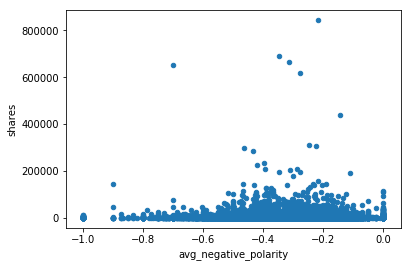

In [292]:
df.plot(kind='scatter', x='avg_negative_polarity', y='shares')

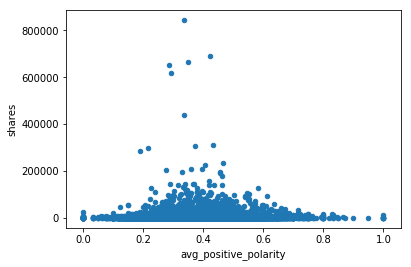

In [293]:
df.plot(kind='scatter', x='avg_positive_polarity', y='shares')

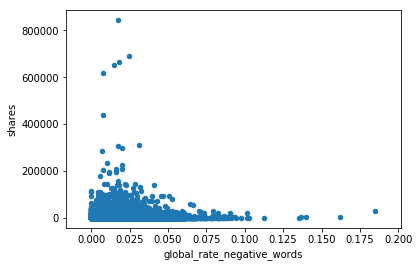

In [294]:
df.plot(kind='scatter', x='global_rate_negative_words', y='shares')

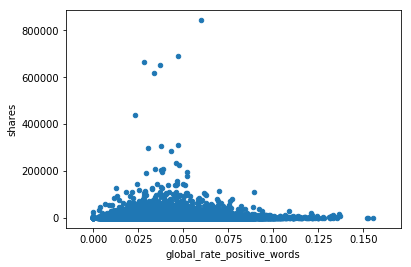

In [295]:
df.plot(kind='scatter', x='global_rate_positive_words', y='shares')

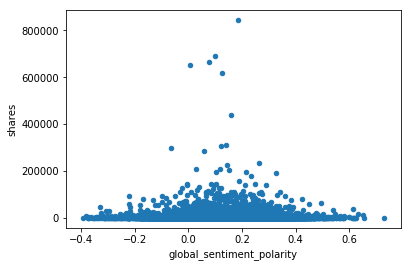

In [296]:
df.plot(kind='scatter', x='global_sentiment_polarity', y='shares')

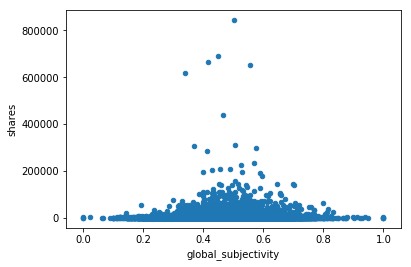

In [297]:
df.plot(kind='scatter', x='global_subjectivity', y='shares')

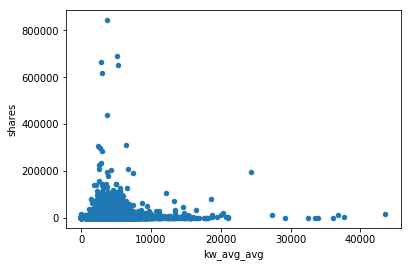

In [298]:
df.plot(kind='scatter', x='kw_avg_avg', y='shares')

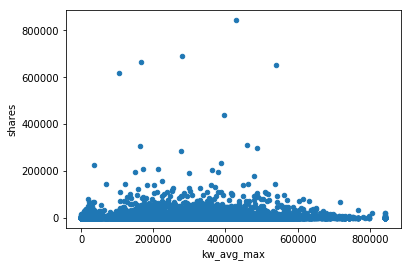

In [299]:
df.plot(kind='scatter', x='kw_avg_max', y='shares')

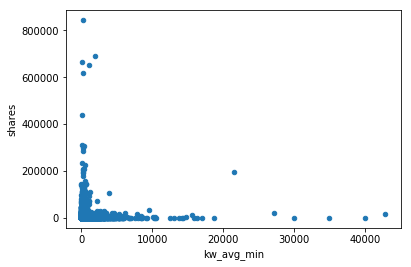

In [300]:
df.plot(kind='scatter', x='kw_avg_min', y='shares')

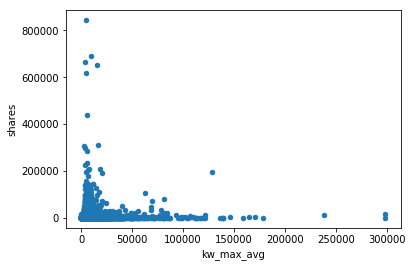

In [301]:
df.plot(kind='scatter', x='kw_max_avg', y='shares')

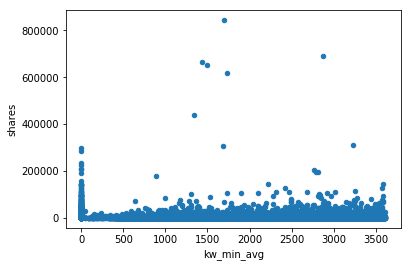

In [302]:
df.plot(kind='scatter', x='kw_min_avg', y='shares')

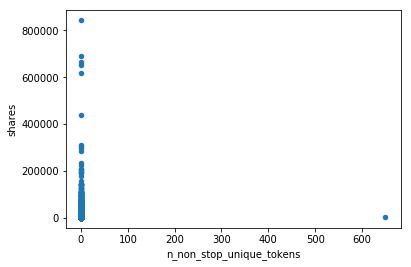

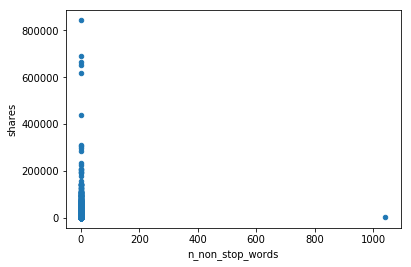

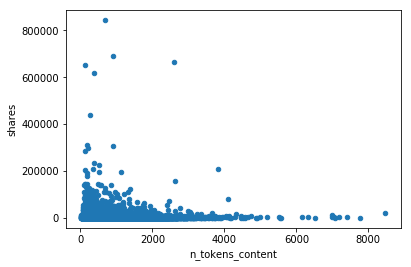

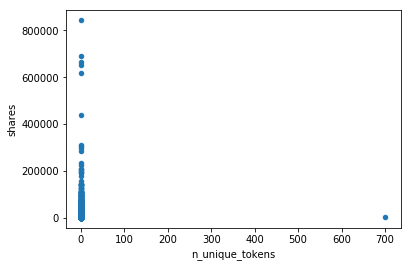

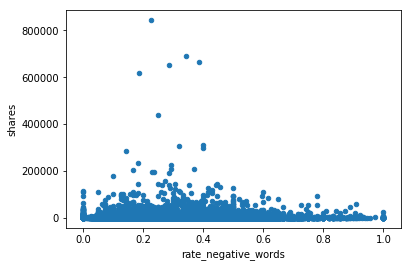

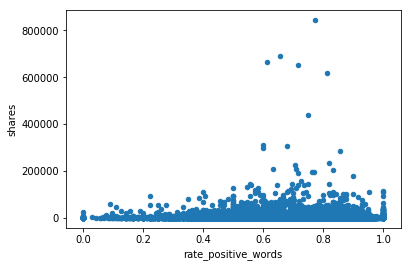

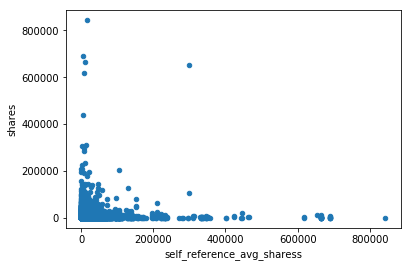

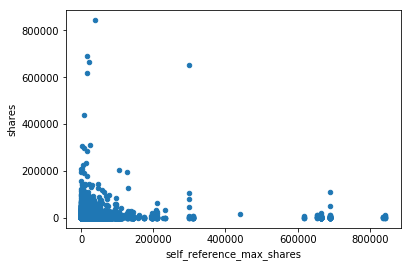

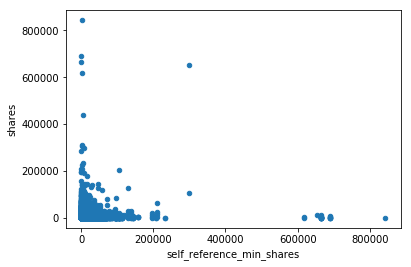

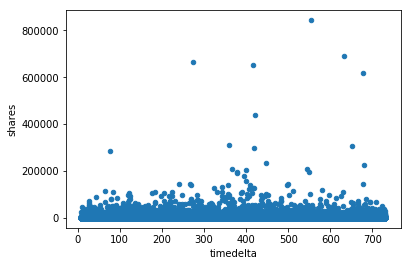

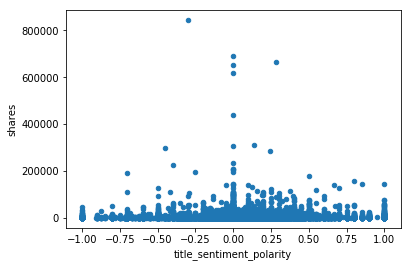

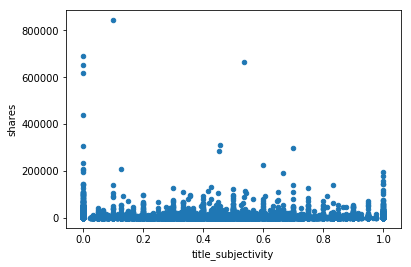

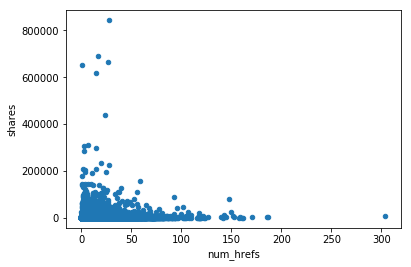

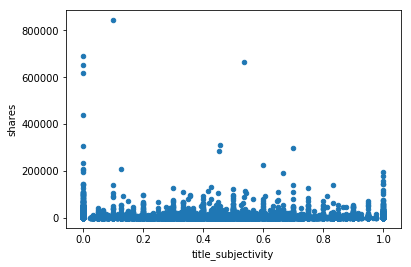

In [303]:
df.plot(kind='scatter', x='n_non_stop_unique_tokens', y='shares')
df.plot(kind='scatter', x='n_non_stop_words', y='shares')
df.plot(kind='scatter', x='n_tokens_content', y='shares')
df.plot(kind='scatter', x='n_unique_tokens', y='shares')
df.plot(kind='scatter', x='rate_negative_words', y='shares')
df.plot(kind='scatter', x='rate_positive_words', y='shares')
df.plot(kind='scatter', x='self_reference_avg_sharess', y='shares')
df.plot(kind='scatter', x='self_reference_max_shares', y='shares')
df.plot(kind='scatter', x='self_reference_min_shares', y='shares')
df.plot(kind='scatter', x='timedelta', y='shares')
df.plot(kind='scatter', x='title_sentiment_polarity', y='shares')
df.plot(kind='scatter', x='title_subjectivity', y='shares')
df.plot(kind='scatter', x='num_hrefs', y='shares')
df.plot(kind='scatter', x='title_subjectivity', y='shares')

# Selection of features using  information gain entropy

In [13]:
#Train a model with all the features
lm1= sm.ols(formula="shares ~  LDA_00 + LDA_01 + LDA_02 + LDA_03 + LDA_04 + abs_title_sentiment_polarity + abs_title_subjectivity + average_token_length + avg_negative_polarity + avg_positive_polarity + global_rate_negative_words +  global_rate_positive_words + global_sentiment_polarity + global_subjectivity + kw_avg_avg + kw_avg_max + kw_avg_min + kw_max_avg + kw_max_min + kw_min_avg + kw_min_max + n_non_stop_unique_tokens + n_non_stop_words + n_tokens_content + n_unique_tokens + num_hrefs + rate_negative_words + rate_positive_words + self_reference_avg_sharess + self_reference_max_shares + self_reference_min_shares + timedelta + title_sentiment_polarity + title_subjectivity", data=df_train).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                 shares   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     15.78
Date:                Thu, 26 Apr 2018   Prob (F-statistic):           1.54e-85
Time:                        11:29:14   Log-Likelihood:            -3.0135e+05
No. Observations:               27751   AIC:                         6.028e+05
Df Residuals:                   27718   BIC:                         6.030e+05
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

# Evaluating the model on training  data
Split the dataset into a training set and a test set. Fit the model on the training set, evaluate both on the training and the test set. Compare the prediction error on both sets.

In [14]:
#Consider first 3000 training examples
#df_train1=df_train[:3000]

In [18]:
predictions_train_sample = lm1.predict(df_train)
predictions_train_sample.head(5)

24881     920.289478
19415    4587.929276
18128    5077.746456
23912    5794.866707
20096    2299.228989
dtype: float64

In [19]:
predictions_train_sample.describe()

count    27751.000000
mean      3408.973368
std       1698.224368
min      -3132.436943
25%       2329.183773
50%       3131.603485
75%       4187.518536
max      32272.903130
dtype: float64

In [20]:
predictions_train_sample.mean()

3408.973367983352

In [25]:
df_thirdQ = predictions_train_sample.quantile(q=0.75,interpolation='linear')
df_thirdQ

4187.518535614014

In [26]:
predictions_train_sample = predictions_train_sample.apply(lambda res: 1 if res > df_thirdQ else 0)
predictions_train_sample.value_counts()

0    20813
1     6938
dtype: int64

In [28]:
df_train['shares'].mean()

3408.9310655471877

In [29]:
shares_thirdQ = df_train['shares'].quantile(q=0.75,interpolation='linear')

In [30]:
df_train['shares_binary'] = np.where(df_train['shares'] >= shares_thirdQ, 1, 0)
df_train['shares_binary'].value_counts()

/Users/Tejaswis/anaconda3/envs/comp47350py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


0    20533
1     7218
Name: shares_binary, dtype: int64

In [31]:
# Prepare the descriptive features
x1 = predictions_train_sample
y1 = df_train.shares_binary
print("Descriptive features:\n", x1.head(4))
print("\nTarget feature:\n", y1.head(4))

Descriptive features:
 24881    0
19415    1
18128    1
23912    1
dtype: int64

Target feature:
 24881    0
19415    0
18128    1
23912    0
Name: shares_binary, dtype: int64


In [32]:
# Evaluation metrics for training data
print("Accuracy: ", metrics.accuracy_score(y1, x1))
print("Confusion matrix: \n", metrics.confusion_matrix(y1, x1))
print("Classification report:\n ", metrics.classification_report(y1, x1))


Accuracy:  0.6963713019350654
Confusion matrix: 
 [[16460  4073]
 [ 4353  2865]]
Classification report:
               precision    recall  f1-score   support

          0       0.79      0.80      0.80     20533
          1       0.41      0.40      0.40      7218

avg / total       0.69      0.70      0.69     27751



# Evaluating the model on test  data
Split the dataset into a training set and a test set. Fit the model on the training set, evaluate both on the training and the test set. Compare the prediction error on both sets.

In [40]:
df_test.shape

(11893, 62)

In [41]:
predictions_test_sample = lm1.predict(df_test)
predictions_test_sample.head(5)

24881     920.289478
19415    4587.929276
18128    5077.746456
23912    5794.866707
20096    2299.228989
dtype: float64

In [42]:
predictions_test_sample.describe()

count    11893.000000
mean      3411.665312
std       1682.498405
min      -3132.436943
25%       2329.384544
50%       3134.933853
75%       4173.734474
max      28215.352337
dtype: float64

In [43]:
df_test_thirdQ = predictions_test_sample.quantile(q=0.75,interpolation='linear')

In [44]:
predictions_test_sample = predictions_test_sample.apply(lambda res: 1 if res > df_test_thirdQ else 0)
predictions_test_sample.value_counts()

0    8920
1    2973
dtype: int64

In [46]:
shares_test_thirdQ = df_test['shares'].quantile(q=0.75,interpolation='linear')

In [47]:
df_test['shares_binary'] = np.where(df_test['shares'] >=shares_test_thirdQ, 1, 0)
df_test['shares_binary'].value_counts()

/Users/Tejaswis/anaconda3/envs/comp47350py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


0    8916
1    2977
Name: shares_binary, dtype: int64

In [48]:
# Prepare the descriptive features
x1 = predictions_test_sample
y1 = df_test.shares_binary
print("Descriptive features:\n", x1.head(4))
print("\nTarget feature:\n", y1.head(4))

Descriptive features:
 24881    0
19415    1
18128    1
23912    1
dtype: int64

Target feature:
 24881    0
19415    0
18128    1
23912    0
Name: shares_binary, dtype: int64


In [50]:
# Evaluation metrics for test data
print("Accuracy: ", metrics.accuracy_score(y1, x1))
print("Confusion matrix: \n", metrics.confusion_matrix(y1, x1))
print("Classification report:\n ", metrics.classification_report(y1, x1))


Accuracy:  0.6956192718405785
Confusion matrix: 
 [[7108 1808]
 [1812 1165]]
Classification report:
               precision    recall  f1-score   support

          0       0.80      0.80      0.80      8916
          1       0.39      0.39      0.39      2977

avg / total       0.70      0.70      0.70     11893



# Selection of features based on the random forest feature importance table.

In [321]:
#Train a model with all the features selected using random forest feature importance table
lm2= sm.ols(formula="shares ~  LDA_00 + LDA_01 + LDA_02 + LDA_03 + LDA_04 + average_token_length + avg_negative_polarity + avg_positive_polarity +  global_rate_positive_words + global_sentiment_polarity + global_subjectivity + kw_avg_avg + kw_avg_max + kw_avg_min + kw_max_avg + kw_max_min  + n_non_stop_unique_tokens + n_non_stop_words + n_tokens_content + n_unique_tokens ", data=df_train).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                 shares   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     27.36
Date:                Thu, 26 Apr 2018   Prob (F-statistic):           3.66e-97
Time:                        11:13:31   Log-Likelihood:            -2.9803e+05
No. Observations:               27751   AIC:                         5.961e+05
Df Residuals:                   27731   BIC:                         5.963e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

# Evaluating the model on training  data
Split the dataset into a training set and a test set. Fit the model on the training set, evaluate both on the training and the test set. Compare the prediction error on both sets.

In [322]:
predictions_train_sample = lm2.predict(df_train)
predictions_train_sample.head(5)

28882    2276.176856
10641    6588.650840
34327    1934.729126
34994    7334.954291
16568    1687.321899
dtype: float64

In [323]:
predictions_train_sample.describe()

count    27751.000000
mean      3335.145256
std       1528.685813
min       -712.933776
25%       2302.331043
50%       3055.633804
75%       4105.278665
max      39150.925769
dtype: float64

In [324]:
predictions_train_sample = predictions_train_sample.apply(lambda res: 1 if res > predictions_train_sample.mean()  else 0)
predictions_train_sample.value_counts()

0    16212
1    11539
dtype: int64

In [325]:
df_train['shares_binary'] = np.where(df_train['shares'] >=df_train['shares'].mean(), 1, 0)
df_train['shares_binary'].value_counts()

/Users/Tejaswis/anaconda3/envs/comp47350py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


0    22174
1     5577
Name: shares_binary, dtype: int64

In [326]:
# Prepare the descriptive features
x1 = predictions_train_sample
y1 = df_train.shares_binary
print("Descriptive features:\n", x1.head(4))
print("\nTarget feature:\n", y1.head(4))

Descriptive features:
 28882    0
10641    1
34327    0
34994    1
dtype: int64

Target feature:
 28882    0
10641    1
34327    0
34994    1
Name: shares_binary, dtype: int64


In [327]:
# Some more evaluation metrics for train data
print("Accuracy: ", metrics.accuracy_score(y1, x1))
print("Confusion matrix: \n", metrics.confusion_matrix(y1, x1))
print("Classification report:\n ", metrics.classification_report(y1, x1))


Accuracy:  0.6284818565096754
Confusion matrix: 
 [[14038  8136]
 [ 2174  3403]]
Classification report:
               precision    recall  f1-score   support

          0       0.87      0.63      0.73     22174
          1       0.29      0.61      0.40      5577

avg / total       0.75      0.63      0.66     27751



# Evaluating the model on test data
Split the dataset into a training set and a test set. Fit the model on the training set, evaluate both on the training and the test set. Compare the prediction error on both sets.

In [328]:
predictions_test_sample = lm2.predict(df_test)
predictions_test_sample.head(5)

28882    2276.176856
10641    6588.650840
34327    1934.729126
34994    7334.954291
16568    1687.321899
dtype: float64

In [329]:
predictions_test_sample.describe()

count    11893.000000
mean      3335.695473
std       1543.146701
min       -712.933776
25%       2307.819863
50%       3050.082269
75%       4104.224394
max      39150.925769
dtype: float64

In [330]:
predictions_test_sample = predictions_test_sample.apply(lambda res: 1 if res > predictions_test_sample.mean()  else 0)
predictions_test_sample.value_counts()

0    6989
1    4904
dtype: int64

In [331]:
df_test['shares_binary'] = np.where(df_test['shares'] >=df_test['shares'].mean(), 1, 0)
df_test['shares_binary'].value_counts()

/Users/Tejaswis/anaconda3/envs/comp47350py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


0    9524
1    2369
Name: shares_binary, dtype: int64

In [332]:
# Prepare the descriptive features
x1 = predictions_test_sample
y1 = df_test.shares_binary
print("Descriptive features:\n", x1.head(4))
print("\nTarget feature:\n", y1.head(4))

Descriptive features:
 28882    0
10641    1
34327    0
34994    1
dtype: int64

Target feature:
 28882    0
10641    1
34327    0
34994    1
Name: shares_binary, dtype: int64


In [333]:
# Some more evaluation metrics for train data
print("Accuracy: ", metrics.accuracy_score(y1, x1))
print("Confusion matrix: \n", metrics.confusion_matrix(y1, x1))
print("Classification report:\n ", metrics.classification_report(y1, x1))


Accuracy:  0.6307912217270664
Confusion matrix: 
 [[6061 3463]
 [ 928 1441]]
Classification report:
               precision    recall  f1-score   support

          0       0.87      0.64      0.73      9524
          1       0.29      0.61      0.40      2369

avg / total       0.75      0.63      0.67     11893

